### PUNTO 1
# Optimización en 2 dimensiones: gradiente descendiente

En esta sección, trabajaremos con la función de Rosenbrock en dos dimensiones. 
su MIN_GLOBAL_ROSENBROCK = (1,1)   (en este caso)

**OBJETIVO:** emplear el método de optimización de gradiente descendente evaluando su desempeño al encontrar el minimo de la función

In [588]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [589]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def grad_rosenbrock(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])

Visualización de la función:

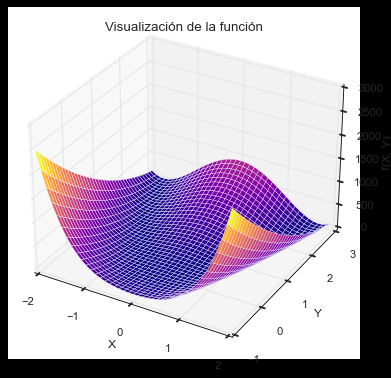

In [590]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
plt.style.use('seaborn-v0_8-white') #style :)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Visualización de la función')
plt.show()

#### GRADIENTE DESCENDIENTE:
1) Implementar el algoritmo de gradiente descendente para minimizar f
2) Probar diferentes tasas de aprendizaje (η o learning rates) para observar su impacto en la convergencia


    ##### ANÁLISIS:

    - efecto de η (learning rates)
    
    - sensibilidad de los métodos a las condiciones iniciales (CI)
        ###### probando múltiples valores iniciales (x0, y0), evaluando y visualizando algunas trayectorias en el plano (x, y) representativas
    - rapidez y #iteraciones
        ###### La rapidez con la que se alcanza el mínimo global, y el número de iteraciones requeridas para alcanzar una tolerancia fija ∥∇f (x, y)∥ < ε.
        

In [591]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-6, max_iter=50000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate  # a explorar
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad) 

        x -= eta * grad
        trajectory.append(x.copy())

        # CONVERGENCIA
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            return x, np.array(trajectory)

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x, np.array(trajectory)



In [592]:
def plot_trajectory2(trajectory, a=1, b=100,title="Trayectoria"):

    plt.style.use('Solarize_Light2') #style :)
    
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y, a, b)

    #POSIBLES COLORES: plasma, PiYG, twilight, twilight_reverse
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap="plasma", alpha=0.85)
    cbar = plt.colorbar(contour)
    cbar.set_label("Valor de $f(x, y)$", fontsize=12)

    #TRAYECTORIA
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'w.-', linewidth=2, markersize=8, label="Trayectoria")
    
    #F0 Ff
    plt.scatter(trajectory[0, 0], trajectory[0, 1], color='cyan', edgecolor='black', s=100, label="Inicio")
    plt.annotate("Inicio", (trajectory[0, 0], trajectory[0, 1]), textcoords="offset points", xytext=(-30, 10), fontsize=10, color="cyan", ha="center")
    
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='orange', edgecolor='black', s=100, label="Final")
    plt.annotate("Final", (trajectory[-1, 0], trajectory[-1, 1]), textcoords="offset points", xytext=(30, -10), fontsize=10, color="orange", ha="center")
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$y$", fontsize=12)
    

    #plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(loc="upper left", fontsize=20)
    

    plt.tight_layout()
    plt.show()

def move_along_contour(grad_f, start, learning_rate=0.01, tol=1e-8, max_iter=500):
    """
    Método para moverse a lo largo de las curvas de nivel de una función.
    """
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        grad_norm = np.linalg.norm(grad)
        
        # Verifica si el gradiente es demasiado pequeño
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
        
        # Direccion ortogonal al gradiente (aproximadamente tangente a la curva de nivel)
        tangential_dir = np.array([-grad[1], grad[0]]) / grad_norm

        # Actualización en la dirección tangencial
        x += learning_rate * tangential_dir
        trajectory.append(x.copy())
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)    

def plot_trajectory(trajectory, title="Trayectoria"):
    plt.style.use('seaborn-v0_8') #style :) bmh
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="Blues_r")
    plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")
    plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color="blue", label="Inicio")
    plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color="purple", label="Final")
    plt.scatter([1], [1], color="black", label="Mínimo")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()
  

In [593]:
start = [-1.5, 2.0]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"\nProbando tasa de aprendizaje: {lr}")
    min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, lr)
    print(f"Punto mínimo encontrado: {min_point}")

#GALERAZO
def optimal_learning_rate(a=1, b=100):
    # La tasa de aprendizaje óptima para la función de Rosenbrock se puede aproximar como 1 / (4 * b)
    return 1 / (4 * b)

optimal_lr = optimal_learning_rate()
print(f"\nTasa de aprendizaje óptima calculada: {optimal_lr}")


min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, optimal_lr)
print(f"Punto mínimo encontrado con la tasa de aprendizaje óptima: {min_point}")


Probando tasa de aprendizaje: 0.0001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [0.91913311 0.84446604]

Probando tasa de aprendizaje: 0.001
Convergencia alcanzada en 32690 iteraciones. Tasa de aprendizaje final: 0.00100
Punto mínimo encontrado: [0.99999888 0.99999776]

Probando tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Probando tasa de aprendizaje: 0.1


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: overflow encountered in scalar power
  dfdy = 2 * b * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 2 * b * (y - x**2)


No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Tasa de aprendizaje óptima calculada: 0.0025
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado con la tasa de aprendizaje óptima: [nan nan]


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1736315704.py:11: RuntimeWarning: invalid value encountered in subtract
  x -= eta * grad


Convergencia alcanzada en 32077 iteraciones. Tasa de aprendizaje final: 0.00100


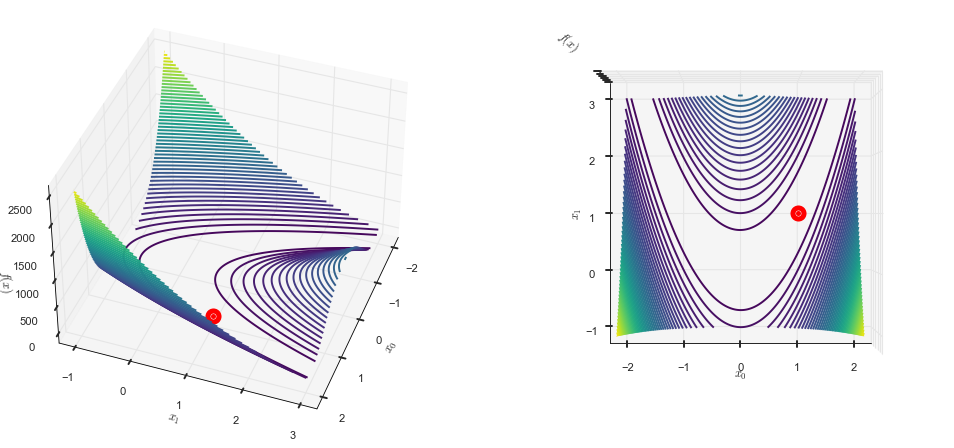

In [594]:
start_point = [-1.2, 1]
learning_rate = 0.001

# Ejecutar el descenso de gradiente
final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start_point, learning_rate)

# Preparar la función objetivo entre -2 y 2
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Minimizer
min_x0, min_x1 = np.meshgrid(final_point[0], final_point[1])   
min_z = rosenbrock(min_x0, min_x1)

# Plot
fig = plt.figure(figsize=(15, 20))

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(40, 20)

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90)

plt.show()


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 32077 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99999888 0.99999776]
Valor de la función en el punto final: 1.2507240978641277e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


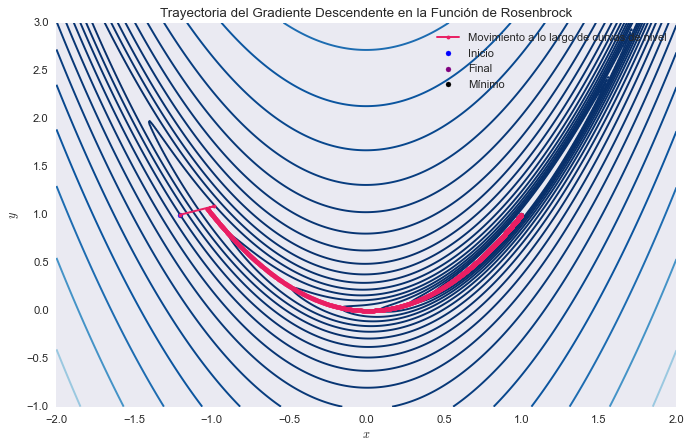


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 34484 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00000112 1.00000224]
Valor de la función en el punto final: 1.2507866685534798e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


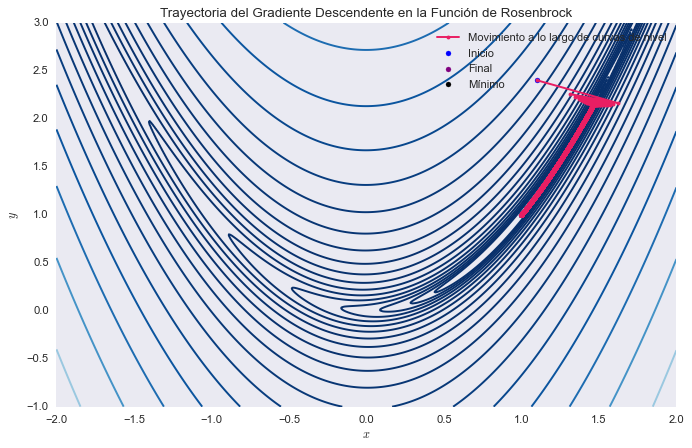


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 31306 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99999888 0.99999776]
Valor de la función en el punto final: 1.2504253443357987e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


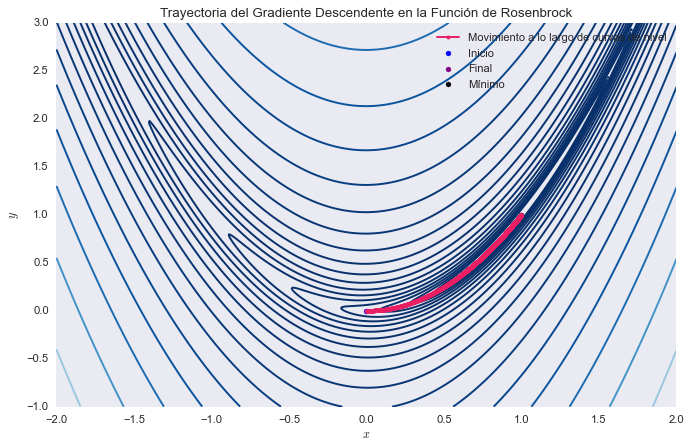


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 31232 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99999888 0.99999776]
Valor de la función en el punto final: 1.2506590885712457e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


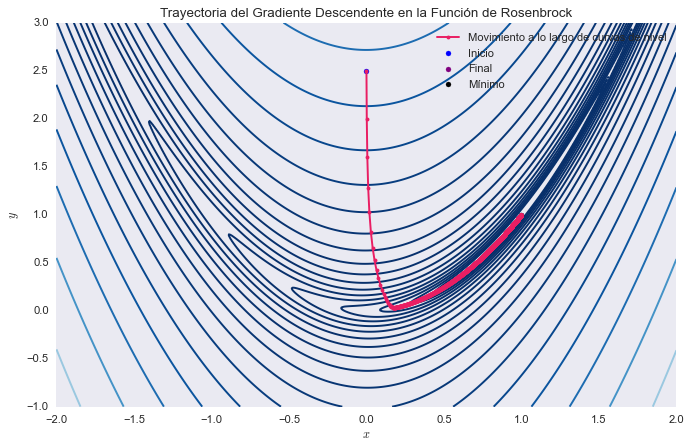


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 31241 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99999888 0.99999776]
Valor de la función en el punto final: 1.2504676438358508e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


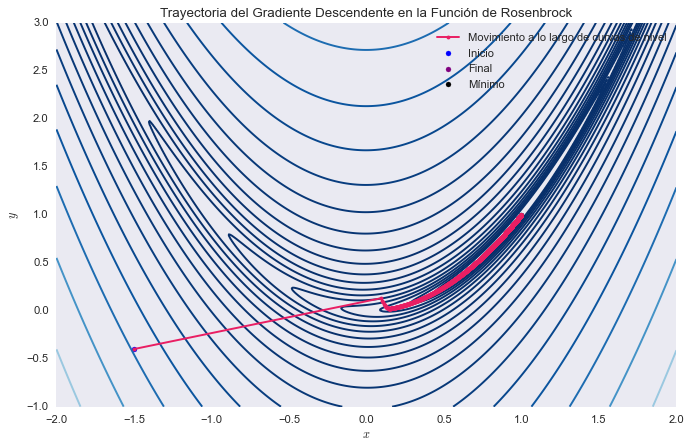


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 32274 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00000112 1.00000224]
Valor de la función en el punto final: 1.2503783814041414e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


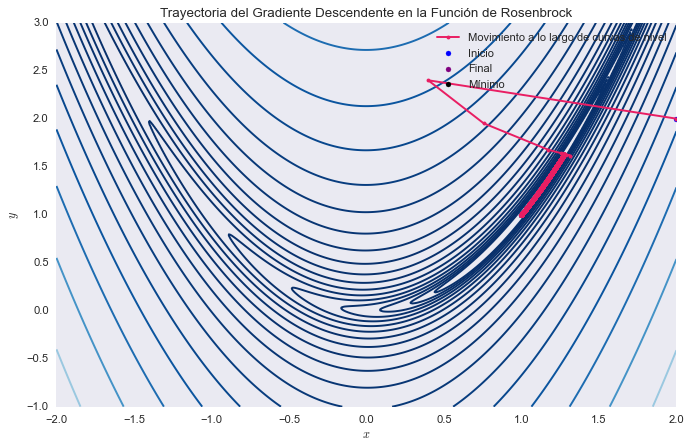


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 30549 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99999888 0.99999776]
Valor de la función en el punto final: 1.2509799528931066e-12


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/25139803.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_vals, y_vals, 'r.-', color="#e91e63",label="Movimiento a lo largo de curvas de nivel")


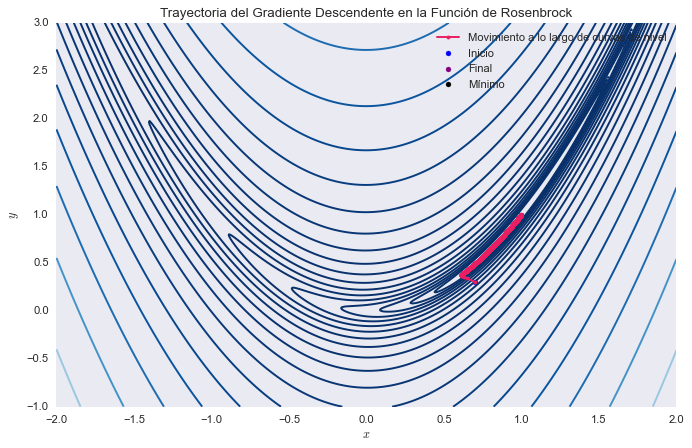

In [595]:
#ACÁ SOLO PRUEBO CON S_{k}=0.01, HAY QUE PROBAR MÁS O VER CÓMO ELEGIR

start_point = [(-1.2, 1), (1.1,2.4), (0,0), (0,2.5), (-1.5,-0.4),(2,2), (0.7,0.3)]  #CI
learning_rates = [0.001, 0.01, 0.1, 1]  #S_{k}

for s_p in start_point:
    print(f"\nTasa de aprendizaje: {0.001}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=0.001)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    plot_trajectory(trajectory, title="Trayectoria del Gradiente Descendente en la Función de Rosenbrock")

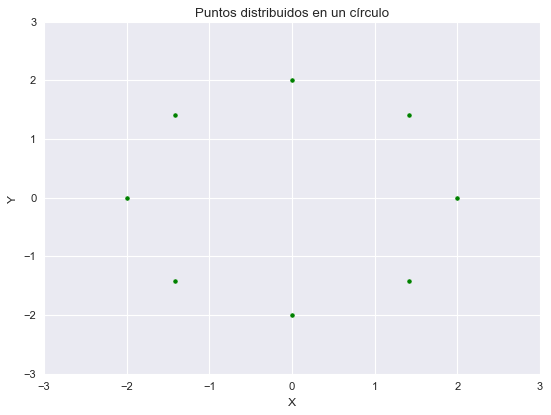

Puntos distribuidos en un círculo:  [(np.float64(2.0), np.float64(0.0)), (np.float64(1.4142135623730951), np.float64(1.414213562373095)), (np.float64(1.2246467991473532e-16), np.float64(2.0)), (np.float64(-1.414213562373095), np.float64(1.4142135623730951)), (np.float64(-2.0), np.float64(2.4492935982947064e-16)), (np.float64(-1.4142135623730954), np.float64(-1.414213562373095)), (np.float64(-3.6739403974420594e-16), np.float64(-2.0)), (np.float64(1.4142135623730947), np.float64(-1.4142135623730954))]


In [596]:
num_points = 8
radius = 2  # Radio del círculo
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)  # Ángulos uniformemente distribuidos

# Convertir a coordenadas cartesianas
x = radius * np.cos(angles)
y = radius * np.sin(angles)

# Mostrar los puntos en un gráfico
plt.scatter(x, y, c='green')
plt.title('Puntos distribuidos en un círculo')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

print("Puntos distribuidos en un círculo: ", list(zip(x, y)))


Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99266994 0.98536414]
Valor de la función en el punto final: 5.3816603343724205e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [1.00553136 1.01111539]
Valor de la función en el punto final: 3.0644664832503144e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99449844 0.98900505]
Valor de la función en el punto final: 3.0315985912206245e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99152247 0.98308271]
Valor de la función en el punto final: 7.198478681460477e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.9991162  0.99822964]
Valor de la función en el punto final: 7.823557434966

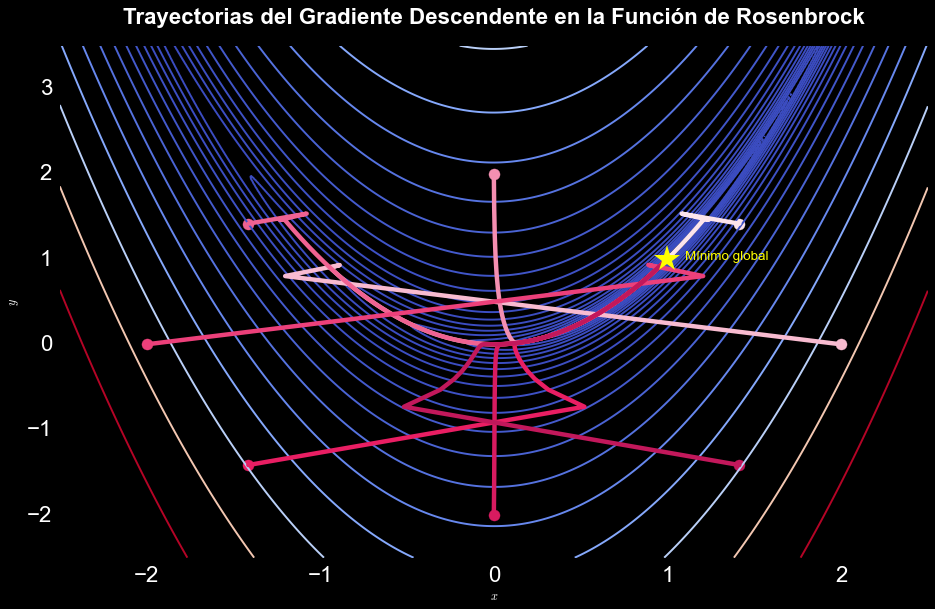

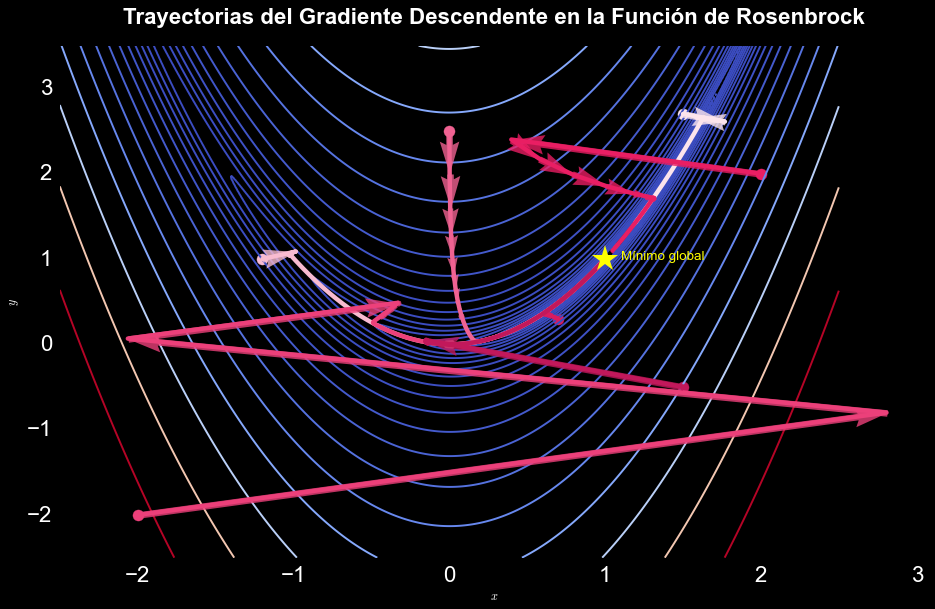

In [597]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-8, max_iter=10000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)

        grad_norm = np.linalg.norm(grad)
        if grad_norm > 1e4:
            grad = grad / grad_norm * 1e4

        x -= eta * grad
        trajectory.append(x.copy())

        current_value = f(x[0], x[1], a, b)

        if current_value > prev_value:
            eta *= 0.5
            print(f"Tasa de aprendizaje reducida a {eta:.5e} en iteración {i}.")
        prev_value = current_value

        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            break
    if grad_norm < tol:    
        print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)

def plot_multiple_trajectories(trajectories, title="Trayectorias del Gradiente Descendente", colors = [
    '#f8bbd0',  # 200
    '#fce4ec',  # 100
    '#f48fb1',  # 300
    '#f06292',  # 400
    '#ec407a',  # 500
    '#e91e63',  # 600
    '#d81b60',  # 700
    '#c2185b',  # 800
    '#ad1457',  # 900
    '#880e4f'   # 1000
], flechas=False):
    plt.style.use('dark_background') #style :) seaborn-v0_8-poster  dark_background
    x = np.linspace(-2.5, 2.5, 400)
    y = np.linspace(-2.5, 3.5, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.figure(figsize=(14, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="coolwarm")
    
    #colors = ['#FF6347', '#00BFFF', '#FF69B4', '#FFA500', '#8A2BE2', '#5F9EA0', '#D2691E', '#D2791E']
    #colors = ['#8A2BE2', '#1E90FF', '#32CD32', '#9370DB', '#87CEFA', '#98FB98', '#4B0082', '#00008B', '#006400']
    #colors = ['#8A2BE2', '#1E90FF', '#32CD32', '#9370DB', '#87CEFA', '#98FB98', '#4B0082', '#00008B', '#008080']
    

    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        plt.plot(x_vals, y_vals, color=colors[i % len(colors)],lw=4, label=f"Inicio {i+1}")
        plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color=colors[i % len(colors)], s = 100, label=f"Inicio {i+1}")
        plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color=colors[i % len(colors)], s = 100, label=f"Final {i+1}")
        
        if flechas:
            for j in range(min(10, len(trajectory) - 1)): #flechas by FRAN ORTEGA
                plt.quiver(trajectory[j, 0], trajectory[j, 1],
                        trajectory[j + 1, 0] - trajectory[j, 0],
                        trajectory[j + 1, 1] - trajectory[j, 1],
                        angles='xy', scale_units='xy', scale=1, color=colors[i % len(colors)], alpha=0.8, zorder=2)
    
    plt.plot([1], [1], '*', color="yellow", label="Mínimo", markersize=25)
    plt.text(1.1, 1, "Mínimo global", color="yellow", zorder=3)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title, fontsize=20, fontweight='bold', pad=20, fontname='Arial')
    #plt.legend()
    plt.grid(False)
    plt.show()

start_points_CUALQUIERAS = [(-1.2, 1), (1.5, 2.7), (0, 0), (0, 2.5), (-2, -2), (2, 2), (0.7, 0.3), (1.5, -0.5)]  # CI
start_points = [(np.float64(2.0), np.float64(0.0)), (np.float64(1.4142135623730951), np.float64(1.414213562373095)), (np.float64(1.2246467991473532e-16), np.float64(2.0)), (np.float64(-1.414213562373095), np.float64(1.4142135623730951)), (np.float64(-2.0), np.float64(2.4492935982947064e-16)), (np.float64(-1.4142135623730954), np.float64(-1.414213562373095)), (np.float64(-3.6739403974420594e-16), np.float64(-2.0)), (np.float64(1.4142135623730947), np.float64(-1.4142135623730954))]
learning_rate = 0.001  # S_{k}

trajectories = []
for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)


trajectories2 = []
for s_p in start_points_CUALQUIERAS:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point2, trajectory2 = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point2[0], final_point2[1])}")
    trajectories2.append(trajectory2)    

plot_multiple_trajectories(trajectories, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock")
plot_multiple_trajectories(trajectories2, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock", flechas=True)

#### IDEA FRAN -> flechas


Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99266994 0.98536414]
Valor de la función en el punto final: 5.3816603343724205e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [1.00553136 1.01111539]
Valor de la función en el punto final: 3.0644664832503144e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99449844 0.98900505]
Valor de la función en el punto final: 3.0315985912206245e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99152247 0.98308271]
Valor de la función en el punto final: 7.198478681460477e-05

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.9991162  0.99822964]
Valor de la función en el punto final: 7.823557434966

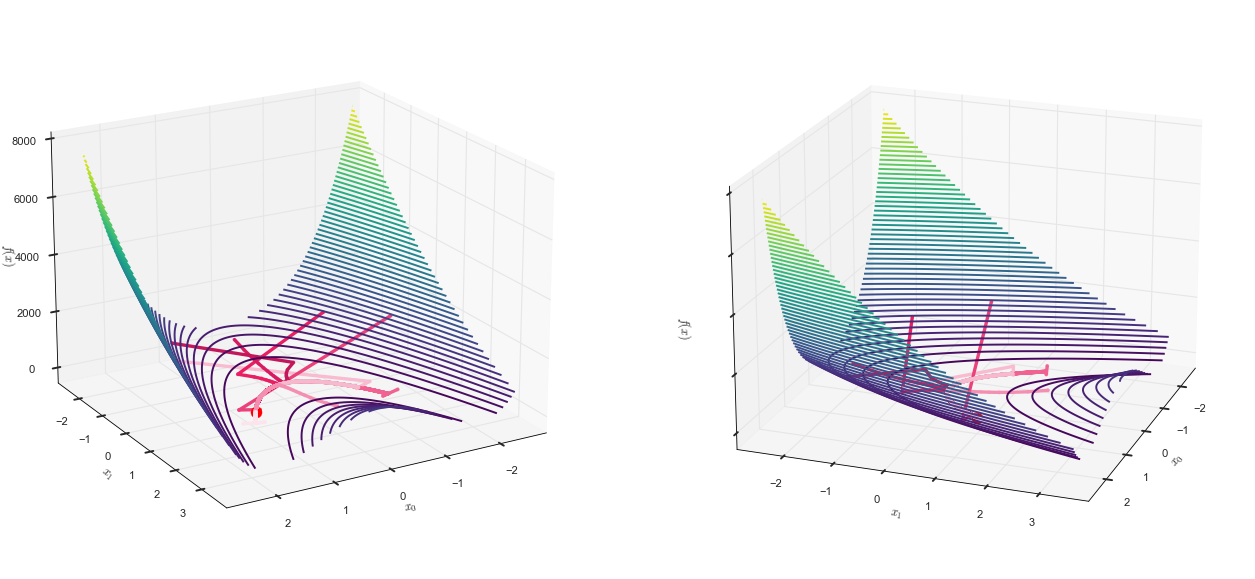

In [598]:
def plot_multiple_trajectories_3d(trajectories, title="Trayectorias del Gradiente Descendente", colors = [
                                                                                                '#f8bbd0',  # 200
                                                                                                '#fce4ec',  # 100
                                                                                                '#f48fb1',  # 300
                                                                                                '#f06292',  # 400
                                                                                                '#ec407a',  # 500
                                                                                                '#e91e63',  # 600
                                                                                                '#d81b60',  # 700
                                                                                                '#c2185b',  # 800
                                                                                                '#ad1457',  # 900
                                                                                                '#880e4f'   # 1000
                                                                                            ]):
    
    x = np.linspace(-2.5, 2.5, 400)
    y = np.linspace(-2.5, 3.5, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.style.use('seaborn-v0_8-white')
    fig = plt.figure(figsize=(20, 20))

    # First subplot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax1.plot(x_vals, y_vals, z_vals, color=colors[i % len(colors)], linewidth=3)
        ax1.scatter(x_vals, y_vals, z_vals, color=colors[i % len(colors)], s=10)
    ax1.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax1.set_xlabel('$x_{0}$')
    ax1.set_ylabel('$x_{1}$')
    ax1.set_zlabel('$f(x)$')
    
    ax1.view_init(20, 60)

    # Second subplot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax2.plot(x_vals, y_vals, z_vals, color=colors[i % len(colors)], linewidth=3)
        ax2.scatter(x_vals, y_vals, z_vals, color=colors[i % len(colors)], s=10)
    ax2.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax2.set_xlabel('$x_{0}$')
    ax2.set_ylabel('$x_{1}$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    #ax2.view_init(0, 45)

    #ax2.set_xlim(-4, 4)
    #ax2.set_ylim(-4, 4)
    #ax2.set_zlim(0, 10000)

    ax2.view_init(20, 20)
    

    plt.show()

# Parámetros iniciales
start_points = [(np.float64(2.0), np.float64(0.0)), (np.float64(1.4142135623730951), np.float64(1.414213562373095)), (np.float64(1.2246467991473532e-16), np.float64(2.0)), (np.float64(-1.414213562373095), np.float64(1.4142135623730951)), (np.float64(-2.0), np.float64(2.4492935982947064e-16)), (np.float64(-1.4142135623730954), np.float64(-1.414213562373095)), (np.float64(-3.6739403974420594e-16), np.float64(-2.0)), (np.float64(1.4142135623730947), np.float64(-1.4142135623730954))]
learning_rate = 0.001  # S_{k}

trajectories = []

for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)

# Graficar todas las trayectorias en dos subplots 3D
plot_multiple_trajectories_3d(trajectories, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock")

Valores extremos:


Tasa de aprendizaje: 0.001
Tasa de aprendizaje reducida a 5.00000e-04 en iteración 1.
Tasa de aprendizaje reducida a 2.50000e-04 en iteración 3.
Tasa de aprendizaje reducida a 1.25000e-04 en iteración 7.
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [3.16170992 9.99974482]
Valor de la función en el punto final: 4.674102138716945

Tasa de aprendizaje: 0.001
Tasa de aprendizaje reducida a 5.00000e-04 en iteración 19.
Tasa de aprendizaje reducida a 2.50000e-04 en iteración 21.
Tasa de aprendizaje reducida a 1.25000e-04 en iteración 23.
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [ 4.18597861 17.52616891]
Valor de la función en el punto final: 10.151867440333108


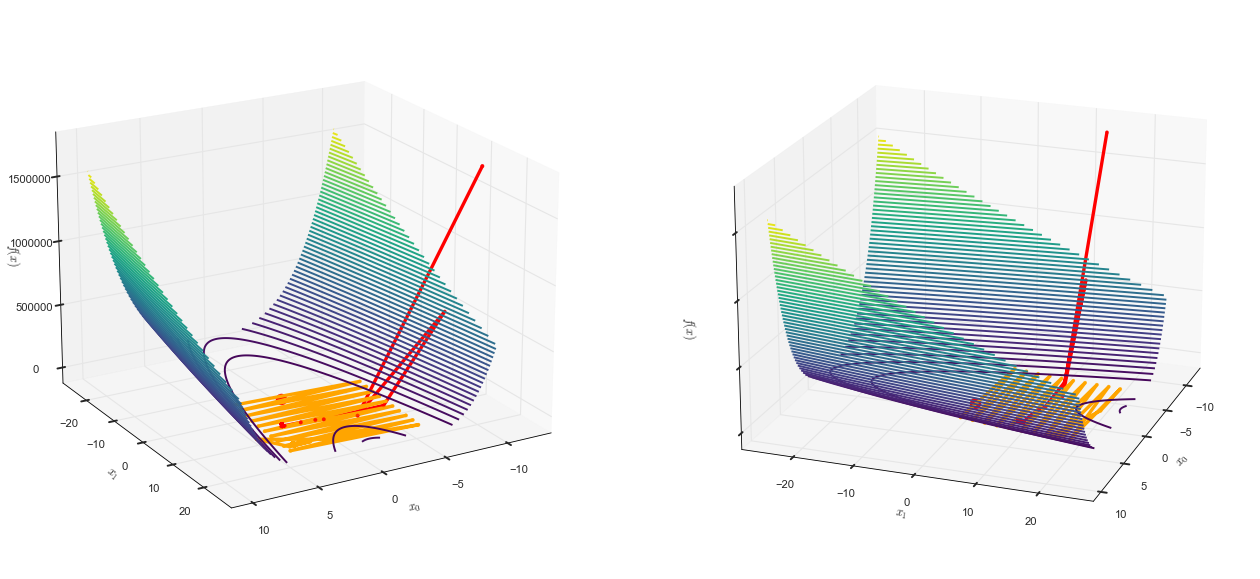

In [599]:
def plot_multiple_trajectories_3d_2(trajectories, title="Trayectorias del Gradiente Descendente", colors = [
                                                                                                '#f8bbd0',  # 200
                                                                                                '#fce4ec',  # 100
                                                                                                '#f48fb1',  # 300
                                                                                                '#f06292',  # 400
                                                                                                '#ec407a',  # 500
                                                                                                '#e91e63',  # 600
                                                                                                '#d81b60',  # 700
                                                                                                '#c2185b',  # 800
                                                                                                '#ad1457',  # 900
                                                                                                '#880e4f'   # 1000
                                                                                            ]):
    
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-25, 25, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.style.use('seaborn-v0_8-white')
    fig = plt.figure(figsize=(20, 20))

    # First subplot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax1.plot(x_vals, y_vals, z_vals, color=colors[i % len(colors)], linewidth=3)
        ax1.scatter(x_vals, y_vals, z_vals, color=colors[i % len(colors)], s=10)
    ax1.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax1.set_xlabel('$x_{0}$')
    ax1.set_ylabel('$x_{1}$')
    ax1.set_zlabel('$f(x)$')
    
    ax1.view_init(20, 60)

    # Second subplot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, Z, 60, cmap='viridis')
    for i, trajectory in enumerate(trajectories):
        x_vals = trajectory[:, 0]
        y_vals = trajectory[:, 1]
        z_vals = rosenbrock(x_vals, y_vals)
        ax2.plot(x_vals, y_vals, z_vals, color=colors[i % len(colors)], linewidth=3)
        ax2.scatter(x_vals, y_vals, z_vals, color=colors[i % len(colors)], s=10)
    ax2.scatter([1], [1], [rosenbrock(1, 1)], marker='o', color='red', s=100)
    ax2.set_xlabel('$x_{0}$')
    ax2.set_ylabel('$x_{1}$')
    ax2.set_zlabel('$f(x)$')
    ax2.axes.zaxis.set_ticklabels([])
    #ax2.view_init(0, 45)

    #ax2.set_xlim(-4, 4)
    #ax2.set_ylim(-4, 4)
    #ax2.set_zlim(0, 10000)

    ax2.view_init(20, 20)
    

    plt.show()


start_points = [(-12,13),(5,2)]

learning_rate = 0.001  # S_{k}

trajectories = []

for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)

# Graficar todas las trayectorias en dos subplots 3D
plot_multiple_trajectories_3d_2(trajectories, title="Trayectorias del Gradiente Descendente en la Función de Rosenbrock", colors=['red', 'orange'], )


Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [nan nan]
Valor de la función en el punto final: nan

Tasa de aprendizaje: 0.001
Convergencia alcanzada en 1914 iteraciones. Tasa de aprendizaje: 0.00100
Punto final estimado: [0.99988907 0.99977771]
Valor de la función en el punto final: 1.232482255602279e-08

Tasa de aprendizaje: 0.001
Convergencia alcanzada en 1753 iteraciones. Tasa de aprendizaje: 0.00100
Punto final estimado: [0.99988887 0.9997773 ]
Valor de la función en el punto final: 1.2370001211497587e-08

Tasa de aprendizaje: 0.001
Convergencia alcanzada en 1899 iteraciones. Tasa de aprendizaje: 0.00100
Punto final estimado: [0.99988878 0.99977713]
Valor de la función en el punto final: 1.2389662258355548e-08

Tasa de aprendizaje: 0.001


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: overflow encountered in scalar power
  dfdy = 2 * b * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 2 * b * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1325698494.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/1494790831.py:11: RuntimeWarning: invalid va

No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [nan nan]
Valor de la función en el punto final: nan

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [nan nan]
Valor de la función en el punto final: nan

Tasa de aprendizaje: 0.001
Convergencia alcanzada en 2088 iteraciones. Tasa de aprendizaje: 0.00100
Punto final estimado: [0.99988908 0.99977774]
Valor de la función en el punto final: 1.232199347794014e-08

Tasa de aprendizaje: 0.001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [nan nan]
Valor de la función en el punto final: nan


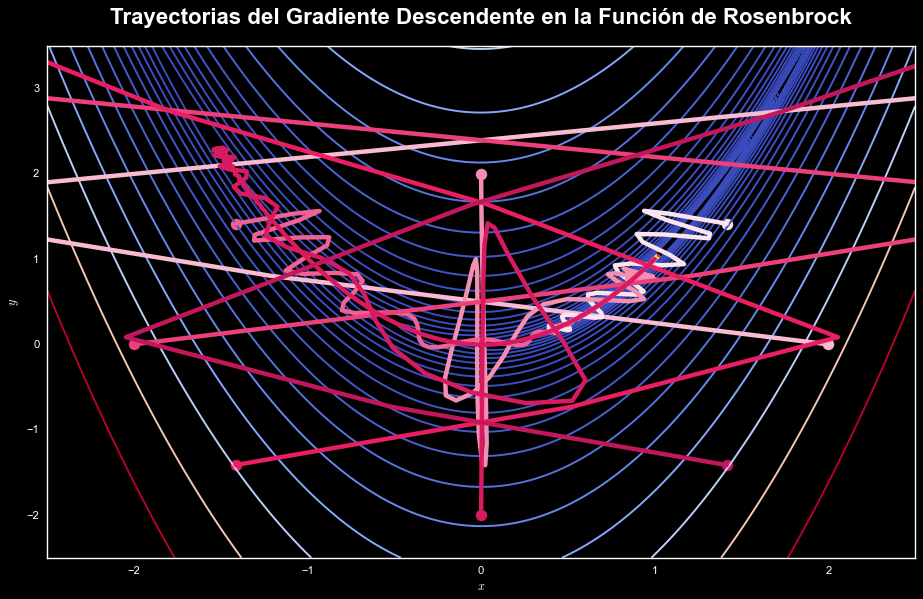

In [600]:
def gradient_descent_with_momentum(f, grad_f, start, learning_rate, momentum=0.9, tol=1e-4, max_iter=50000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate
    velocity = np.zeros_like(x)
    
    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad)

        velocity = momentum * velocity - learning_rate * grad
        x += velocity 
        trajectory.append(x.copy())

        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje: {learning_rate:.5f}")
            return x, np.array(trajectory)

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x, np.array(trajectory)

# Parámetros iniciales
start_points = [(np.float64(2.0), np.float64(0.0)), (np.float64(1.4142135623730951), np.float64(1.414213562373095)), (np.float64(1.2246467991473532e-16), np.float64(2.0)), (np.float64(-1.414213562373095), np.float64(1.4142135623730951)), (np.float64(-2.0), np.float64(2.4492935982947064e-16)), (np.float64(-1.4142135623730954), np.float64(-1.414213562373095)), (np.float64(-3.6739403974420594e-16), np.float64(-2.0)), (np.float64(1.4142135623730947), np.float64(-1.4142135623730954))]
learning_rate = 0.001  # S_{k}

trajectories = []

for s_p in start_points:
    print(f"\nTasa de aprendizaje: {learning_rate}")
    final_point, trajectory = gradient_descent_with_momentum(rosenbrock, grad_rosenbrock, s_p, learning_rate=learning_rate)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    trajectories.append(trajectory)

# Graficar las trayectorias
plt.style.use('dark_background') #style :) seaborn-v0_8-poster  dark_background
x = np.linspace(-2.5, 2.5, 400)
y = np.linspace(-2.5, 3.5, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(14, 8))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="coolwarm")

colors = [
    '#f8bbd0',  # 200
    '#fce4ec',  # 100
    '#f48fb1',  # 300
    '#f06292',  # 400
    '#ec407a',  # 500
    '#e91e63',  # 600
    '#d81b60',  # 700
    '#c2185b',  # 800
    '#ad1457',  # 900
    '#880e4f'   # 1000
]

for i, trajectory in enumerate(trajectories):
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]
    plt.plot(x_vals, y_vals, color=colors[i % len(colors)], lw=4, label=f"Inicio {i+1}")
    plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color=colors[i % len(colors)], s=100, label=f"Inicio {i+1}")
    plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color=colors[i % len(colors)], s=100, label=f"Final {i+1}")

plt.scatter([1], [1], color="yellow", marker='*', s=200, label="Mínimo")

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 3.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Trayectorias del Gradiente Descendente en la Función de Rosenbrock", fontsize=20, fontweight='bold', pad=20, fontname='Arial')
plt.grid(False)
plt.show()

#### NEWTON:
1) Implementen el método de Newton, que utiliza el gradiente y la matriz Hessiana de f (x, y): xn+1 = xn − H−1(xn)∇f(xn)

    ##### ANÁLISIS:

    - Estudien cuál método converge más rápido al mínimo global, con qué orden de convergencia.

No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado por descenso de gradiente: [0.99020202 0.98046061]
Convergencia alcanzada en 8 iteraciones.
Punto mínimo encontrado por método de Newton: [1. 1.]


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/2992686395.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], 'r.-', lw= 5, color='#f8bbd0', markersize=10,  label="Descenso de gradiente")
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_17330/2992686395.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(trajectory_newton[:, 0], trajectory_newton[:, 1], 'b.-', lw= 5, color= '#d81b60', markersize=10, label="Método de Newton")


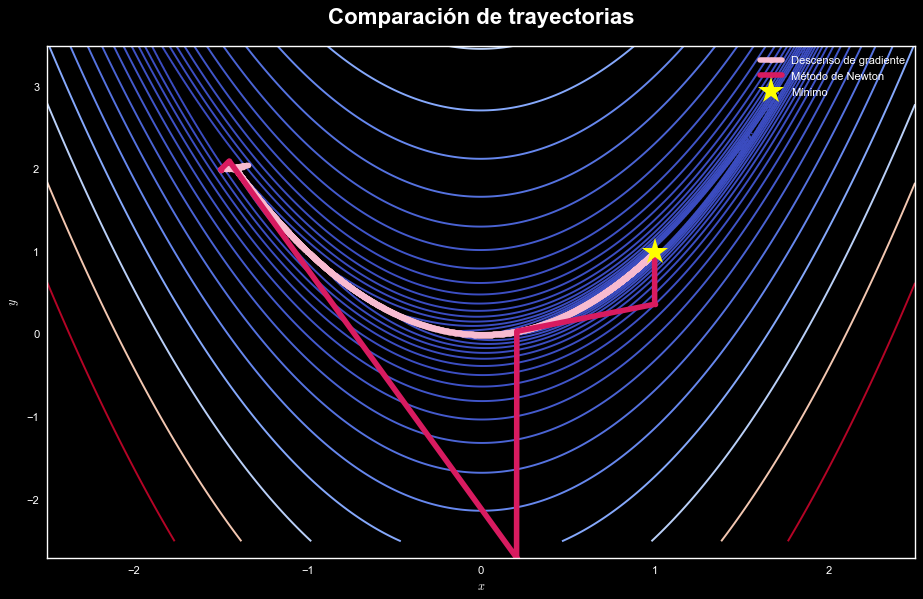

In [603]:
def hessian_rosenbrock(x, y, a=1, b=100):
    d2f_dx2 = 2 - 4 * b * y + 12 * b * x**2
    d2f_dy2 = 2 * b
    d2f_dxdy = -4 * b * x
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

def newton_method(f, grad_f, hessian_f, start, tol=1e-8, max_iter=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        hessian = hessian_f(x[0], x[1])

        x -= np.linalg.inv(hessian) @ grad
        trajectory.append(x.copy())

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)

start = [-1.5, 2.0]
learning_rate = 0.001

min_point_gd, trajectory_gd = gradient_descent(rosenbrock, grad_rosenbrock, start, learning_rate)
print(f"Punto mínimo encontrado por descenso de gradiente: {min_point_gd}")


min_point_newton, trajectory_newton = newton_method(rosenbrock, grad_rosenbrock, hessian_rosenbrock, start)
print(f"Punto mínimo encontrado por método de Newton: {min_point_newton}")
#plot_multiple_trajectories([trajectory_newton, trajectory_gd], title="Trayectoria del método de Newton", colors=['#f8bbd0', '#ad1457'])


plt.style.use('dark_background') #style :) seaborn-v0_8-poster  dark_background
x = np.linspace(-2.5, 2.5, 400)
y = np.linspace(-2.5, 3.5, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(14, 8))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap="coolwarm")


plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], 'r.-', lw= 5, color='#f8bbd0', markersize=10,  label="Descenso de gradiente")
plt.plot(trajectory_newton[:, 0], trajectory_newton[:, 1], 'b.-', lw= 5, color= '#d81b60', markersize=10, label="Método de Newton")

plt.plot([1], [1], '*', color="yellow", label="Mínimo", markersize=25)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Comparación de trayectorias", fontsize=20, fontweight='bold', pad=20, fontname='Arial')
plt.grid(False)
plt.legend()
plt.show()



Convergencia alcanzada en 32690 iteraciones. Tasa de aprendizaje final: 0.00100
Convergencia alcanzada en 32690 iteraciones. Tasa de aprendizaje final: 0.00100
Punto mínimo encontrado por descenso de gradiente: [0.99999888 0.99999776]
Convergencia alcanzada en 8 iteraciones.
Punto mínimo encontrado por método de Newton: [1. 1.]


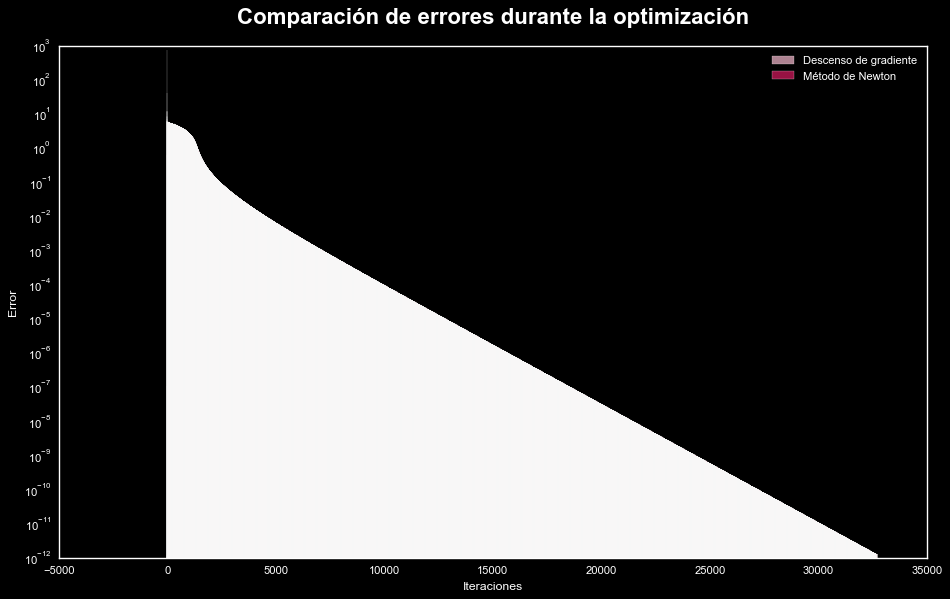

In [ ]:
#ver de representar visualmente errores
